# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [1]:
#pip install tensorflow

In [2]:
import tensorflow as tf          #for building and training neural networks.
import matplotlib.pyplot as plt  #for plotting graphs
import pandas as pd              #for data manipulation and analysis
import seaborn as sns            # for statistical data visualization.

## Data Preprocessing

### Training Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train', #directory name 
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

"""
This part preprocesses the training image dataset:

It loads images from the 'train' directory.
Images are labeled using inferred labels.
Labels are encoded in categorical format.
Images are resized to 128x128 pixels.
Data is shuffled, and a batch size of 32 is used for training.
"""

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing 

In [4]:
#preprocesses the validation image dataset.


validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical", #binary if there are only 2 classes
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

In [ ]:
# information about the training and validation datasets.

In [5]:
training_set 

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
validation_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  ...

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]]

  [[  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   ...
   [  0.     0.     0.  ]
   [  0.     0.     0.  ]
   [  0.     0.     

## Building Model

In [8]:
cnn = tf.keras.models.Sequential() #creating sequential model

### Building Convolution Layer
#This section adds convolutional layers (Conv2D), followed by activation functions (ReLU), and max-pooling layers (MaxPool2D). This forms the convolutional base of the neural network.

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Dropout(0.25)) #A dropout layer is added to prevent overfitting by randomly setting 
                                       #a fraction of input units to zero during training.

In [15]:
cnn.add(tf.keras.layers.Flatten()) #A flatten layer is added to convert the 2D feature maps into a 1D vector

In [16]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
#A dense layer with 1500 neurons and ReLU activation is added for classification.

In [17]:
cnn.add(tf.keras.layers.Dropout(0.4)) #another layer To avoid overfitting

In [18]:
#Output Layer    #The final output layer with 38 units (for 38 classes of plant diseases) and softmax activation is added.
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))


### Compiling and Training Phase

In [19]:
#The model is compiled with Adam optimizer, categorical cross-entropy loss function, and accuracy metric.
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [21]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2197/2197 [==============================] - 992s 451ms/step - loss: 1.4074 - accuracy: 0.5875 - val_loss: 0.5237 - val_accuracy: 0.8406
Epoch 2/10
2197/2197 [==============================] - 1000s 455ms/step - loss: 0.4727 - accuracy: 0.8508 - val_loss: 0.2991 - val_accuracy: 0.9041
Epoch 3/10
2197/2197 [==============================] - 995s 453ms/step - loss: 0.2767 - accuracy: 0.9110 - val_loss: 0.2407 - val_accuracy: 0.9204
Epoch 4/10
2197/2197 [==============================] - 983s 448ms/step - loss: 0.1929 - accuracy: 0.9361 - val_loss: 0.1853 - val_accuracy: 0.9415
Epoch 5/10
2197/2197 [==============================] - 987s 449ms/step - loss: 0.1447 - accuracy: 0.9527 - val_loss: 0.1641 - val_accuracy: 0.9464
Epoch 6/10
2197/2197 [==============================] - 990s 451ms/step - loss: 0.1147 - accuracy: 0.9627 - val_loss: 0.1664 - val_accuracy: 0.9488
Epoch 7/10
2197/2197 [==============================] - 991s 451ms/step - loss: 0.0904 - accuracy: 0.9705 - v

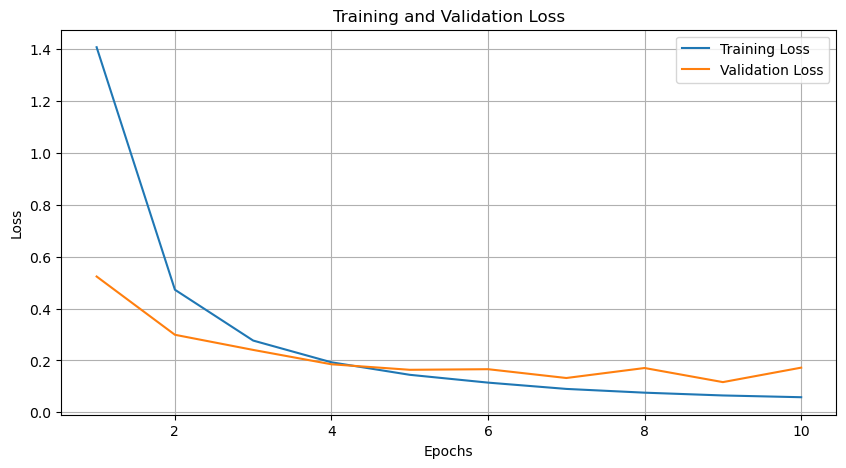

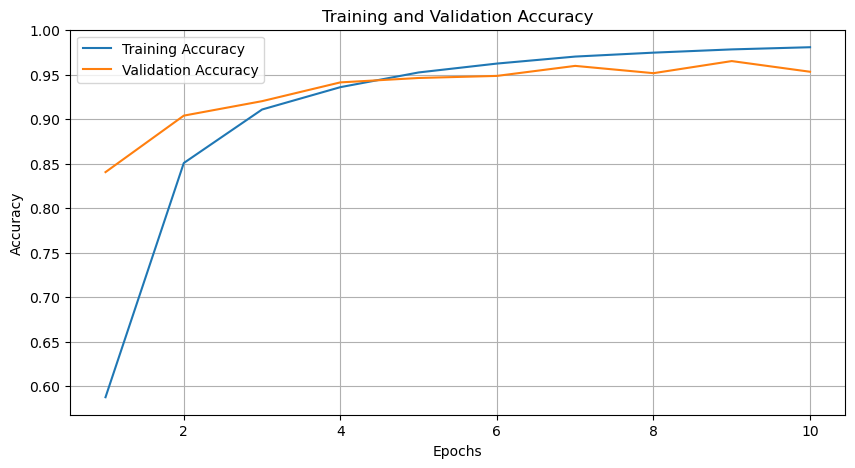

In [23]:
import matplotlib.pyplot as plt

# Extracting training history
loss = training_history.history['loss']
val_loss = training_history.history['val_loss']
accuracy = training_history.history['accuracy']
val_accuracy = training_history.history['val_accuracy']

# Plotting loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


## Evaluating Model

In [24]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 329s 150ms/step - loss: 0.0516 - accuracy: 0.9835
Training accuracy: 0.9834839105606079


In [25]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 83s 151ms/step - loss: 0.1724 - accuracy: 0.9534
Validation accuracy: 0.9534486532211304


### Saving Model

In [26]:
cnn.save('trained_plant_disease_model.h5')

C:\Users\Mit Thaker\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
training_history.history #Return Dictionary of history

{'loss': [1.4074296951293945,
  0.47269442677497864,
  0.2767143249511719,
  0.19292573630809784,
  0.14474983513355255,
  0.11465860903263092,
  0.09037670493125916,
  0.07589419186115265,
  0.06516342610120773,
  0.05836907774209976],
 'accuracy': [0.5874813199043274,
  0.8508286476135254,
  0.9110036492347717,
  0.9361263513565063,
  0.9526708722114563,
  0.9626573920249939,
  0.9705241918563843,
  0.9749342203140259,
  0.9785902500152588,
  0.9810370802879333],
 'val_loss': [0.5236546397209167,
  0.2990695834159851,
  0.24069811403751373,
  0.18531262874603271,
  0.1640913486480713,
  0.16637808084487915,
  0.13244527578353882,
  0.17095531523227692,
  0.1166083812713623,
  0.17236122488975525],
 'val_accuracy': [0.8405987024307251,
  0.9041088223457336,
  0.9203847050666809,
  0.9414978623390198,
  0.9464489221572876,
  0.9487821459770203,
  0.960050106048584,
  0.9518552422523499,
  0.9654564261436462,
  0.9534486532211304]}

In [28]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [29]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

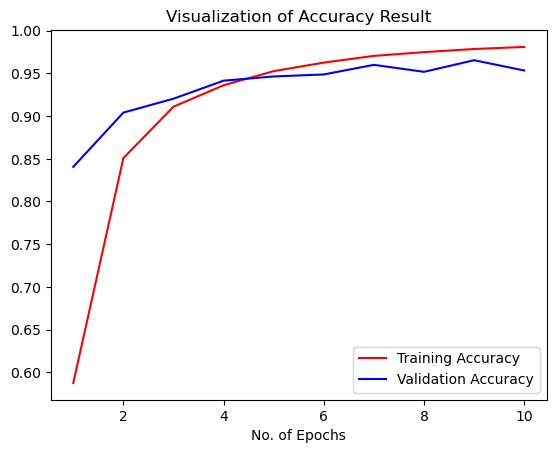

In [30]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [31]:
class_name = validation_set.class_names

In [32]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [33]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 234s 13ms/step


In [34]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [35]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [36]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [38]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.95      0.97       504
                                 Apple___Black_rot       0.98      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.96      0.97       440
                                   Apple___healthy       0.98      0.97      0.98       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.97      0.98       421
                 Cherry_(including_sour)___healthy       0.96      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.88      0.95      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.94      0.

### Confusion Matrix Visualization

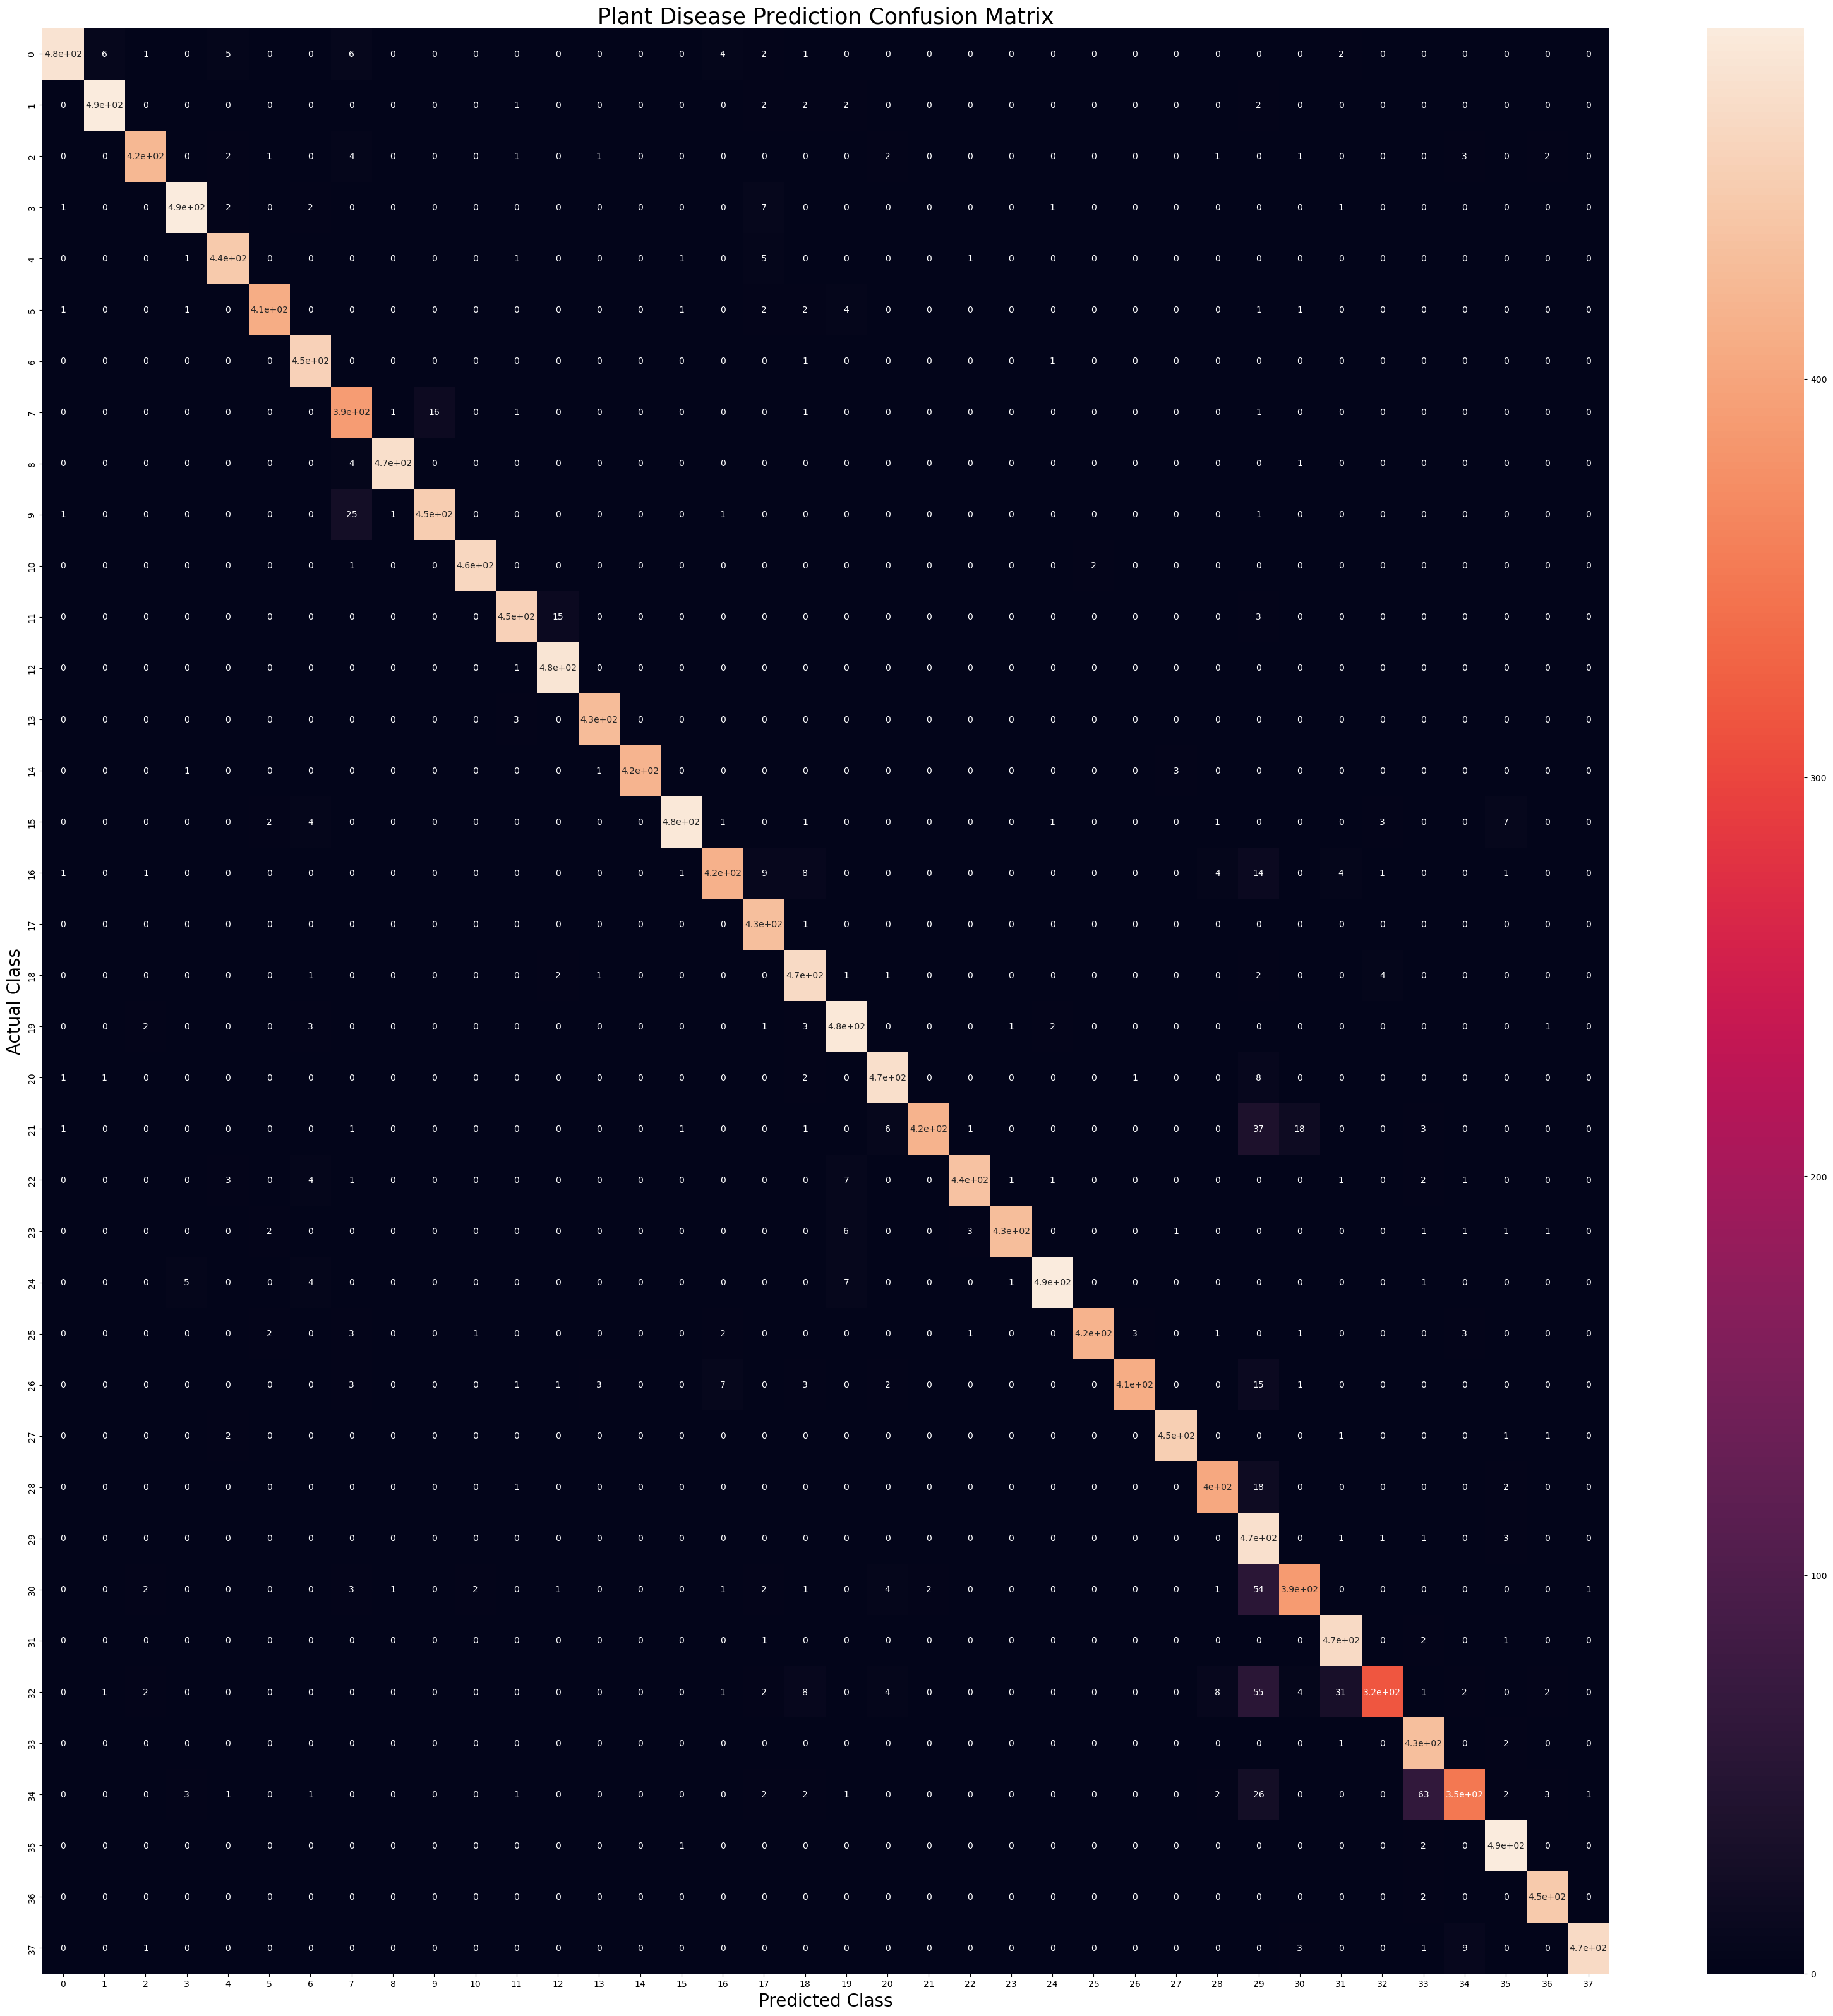

In [39]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()